### Regresión Lineal

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = np.linspace(0,10,10)
y = np.linspace(0,5,10)

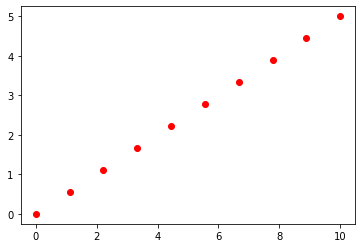

In [3]:
%matplotlib inline
plt.plot(x,y,'ro')

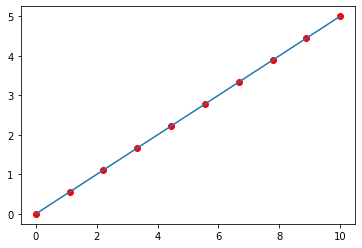

In [4]:
plt.plot(x,y,'ro')
plt.plot(x, np.poly1d(np.polyfit(x,y,1))(x))
plt.show()

In [5]:
(y[1]-y[0])/(x[1]-x[0]) # pendiente

0.5

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

#### Dataset

In [7]:
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dftest = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")

In [8]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [9]:
dftrain.groupby("survived").mean()

,age,n_siblings_spouses,parch,fare
survived,,,,
0,29.960938,0.591146,0.325521,23.428448
1,29.110412,0.473251,0.465021,51.700086


In [10]:
dftrain.groupby("sex").mean()

,survived,age,n_siblings_spouses,parch,fare
sex,,,,,
female,0.778802,28.652074,0.654378,0.62212,47.118741
male,0.180488,30.149585,0.487805,0.25122,27.646044


In [11]:
y_train = dftrain.pop("survived")
y_eval = dftest.pop("survived")

In [12]:
dftrain.shape, dftest.shape

((627, 9), (264, 9))

In [13]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [14]:
dftrain.loc[0]

sex                          male
age                            22
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object

In [15]:
dftrain = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
dftest = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/eval.csv")

y_train = dftrain.pop("survived")
y_eval = dftest.pop("survived")

CATEGORICAL_COLUMNS = ["sex", "n_siblings_spouses", "parch", "class", "deck",
                       "embark_town", "alone"]
NUMERICAL_COLUMNS = ["age", "fare"]

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() #list of all unique values from given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERICAL_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

#### Entrenar el modelo

Se va a pasar la información al modelo en batches, esto es util para cuando haya teras de información, para que vaya más rápido. En cada batch habrá unos epochs, que serán reorganizaciones distintas de los mismos datos para que el modelo aprenda mejor, hay que tener cuidado con el overfitting

In [16]:
# Hay que pasar los datos de obejto pandas.DataFrame a tensorflow.Dataset
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function(): #función interna, será la que se retorne
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dftest, y_eval, num_epochs=1, shuffle=False)

In [18]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jaime\\AppData\\Local\\Temp\\tmpj5239rfy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
linear_est.train(train_input_fn) # train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on testing data

clear_output()
print(result["accuracy"])

0.75


In [20]:
print(result)

{'accuracy': 0.75, 'accuracy_baseline': 0.625, 'auc': 0.8228344, 'auc_precision_recall': 0.7537705, 'average_loss': 0.5247024, 'label/mean': 0.375, 'loss': 0.52348894, 'precision': 0.63414633, 'prediction/mean': 0.45503893, 'recall': 0.7878788, 'global_step': 200}


In [28]:
result = list(linear_est.predict(eval_input_fn))
print(result[4]["probabilities"])
print(dftest.loc[4])
print(y_eval.loc[4])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jaime\AppData\Local\Temp\tmpj5239rfy\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[0.67058283 0.32941717]
sex                          male
age                            34
n_siblings_spouses              0
parch                           0
fare                           13
class             

### Dataset de las flores con DeepNeuralNetwork

In [29]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd

In [33]:
CSV_COLUMNS_NAMES = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
SPECIES = ["Setosa", "Versicolor", "Virginica"]

In [34]:
train_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMNS_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMNS_NAMES, header=0)

In [35]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [37]:
train_y = train.pop("Species")
test_y = test.pop("Species")

In [39]:
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

In [40]:
train.shape, test.shape

((120, 4), (30, 4))

In [41]:
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a dataset
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))
    
    # Shuffle and repeat if you are in training mode
    if training:
        dataset = dataset.shuffle(1000).repeat()
    
    return dataset.batch(batch_size)

In [42]:
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [44]:
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    # Two idden layers of 30 and 10 nodes respectively.
    hidden_units=[30,10],
    # the model must choose between 3 classes.
    n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\jaime\\AppData\\Local\\Temp\\tmpqgv1z_9x', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Training

In [45]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\jaime\AppData\Local\Temp\tmpqgv1z_9x\model.ckpt.
INFO:tensorflow:loss = 1.4610412, step = 0
INFO:tensorflow:global_step/sec: 249.918
INFO:tensorflow:loss = 0.8205689, step = 100 (0.400 sec)
INFO:tensorflow:global_ste

In [47]:
eval_result=classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))
print("\nTest set accuracy: {accuracy:0.3f}".format(**eval_result))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-10-19T15:26:37Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jaime\AppData\Local\Temp\tmpqgv1z_9x\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.35005s
INFO:tensorflow:Finished evaluation at 2020-10-19-15:26:38
INFO:tensorflow:Saving dict for global step 5000: 

In [55]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
    valid = True
    while valid:
        val = input(feature + ": ")
        print(val)
        if not val.isdigit():
            valid=False
    
    predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict["class_ids"][0]
    probability = pred_dict["probabilities"][class_id]
    
    print("Prediction is '{}' ({:.1f}%)".format(
        SPECIES[class_id], 100*probability))

Please type numeric values as prompted.
SepalLength: 3.2
3.2
SepalWidth: 1.6
1.6
PetalLength: 6.8
6.8
PetalWidth: 3.9
3.9
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\jaime\AppData\Local\Temp\tmpqgv1z_9x\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is 'Virginica' (97.1%)


### Clustering
Se usa cuando tienes información (input) pero no tienes labels o información de output (unsupervised)

### Hidden Markov Model

In [59]:
import tensorflow_probability as tfp
import tensorflow as tf

#### Weather Model

In [77]:
tfd = tfp.distributions
# Probabilidad 80 para día frio (0) y probabilidad 20 para dia calido (1)
initial_dist = tfd.Categorical(probs=[0.2,0.8])
# Transición a segundo día, si el primero es frio hay 70 de que el segundo
# tambien y 30 de que cambie. Si el primero es calido hay 80 de que se
# mantenga y 20 de que cambie.
transition_dist = tfd.Categorical(probs=[[0.7,0.3],
                                         [0.2,0.8]])
observation_dist = tfd.Normal(loc=[0., 15.], scale=[5., 10.])
# loc es la media y scale la desviacion tipica

In [78]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_dist,
    transition_distribution=transition_dist,
    observation_distribution=observation_dist,
    num_steps=7)
# steps es por cuantos ciclos queremos correr el modelo (7 dias)

In [79]:
mean = model.mean()

# tenemos que crear una sesion para verlo bien
with tf.compat.v1.Session() as sess:
    print(mean.numpy())
# temperaturas predichas empezando en dia frio

[12.       10.5       9.75      9.375     9.1875    9.09375   9.046875]


In [ ]:
tf.estimator.